# **FOR 32 CITIES**

In [133]:
# capacitated vehicle routing for k means clustering algorithm
import numpy as np
import pandas as pd
# np.random.seed(1)
from numpy import loadtxt
from operator import itemgetter

In [134]:
# for using different data set
# file1 = np.loadtxt("/content/21 customers data sert.txt")
# print(file1)
file1 = np.loadtxt("/content/33 demand and location.txt")
print(file1)

[[1.00e+00 2.92e+02 4.95e+02 0.00e+00]
 [2.00e+00 2.98e+02 4.27e+02 7.00e+02]
 [3.00e+00 3.09e+02 4.45e+02 4.00e+02]
 [4.00e+00 3.07e+02 4.64e+02 4.00e+02]
 [5.00e+00 3.36e+02 4.75e+02 1.20e+03]
 [6.00e+00 3.20e+02 4.39e+02 4.00e+01]
 [7.00e+00 3.21e+02 4.37e+02 8.00e+01]
 [8.00e+00 3.22e+02 4.37e+02 2.00e+03]
 [9.00e+00 3.23e+02 4.33e+02 9.00e+02]
 [1.00e+01 3.24e+02 4.33e+02 6.00e+02]
 [1.10e+01 3.23e+02 4.29e+02 7.50e+02]
 [1.20e+01 3.14e+02 4.35e+02 1.50e+03]
 [1.30e+01 3.11e+02 4.42e+02 1.50e+02]
 [1.40e+01 3.04e+02 4.27e+02 2.50e+02]
 [1.50e+01 2.93e+02 4.21e+02 1.60e+03]
 [1.60e+01 2.96e+02 4.18e+02 4.50e+02]
 [1.70e+01 2.61e+02 3.84e+02 7.00e+02]
 [1.80e+01 2.97e+02 4.10e+02 5.50e+02]
 [1.90e+01 3.15e+02 4.07e+02 6.50e+02]
 [2.00e+01 3.14e+02 4.06e+02 2.00e+02]
 [2.10e+01 3.21e+02 3.91e+02 4.00e+02]
 [2.20e+01 3.21e+02 3.98e+02 3.00e+02]
 [2.30e+01 3.14e+02 3.94e+02 1.30e+03]
 [2.40e+01 3.13e+02 3.78e+02 7.00e+02]
 [2.50e+01 3.04e+02 3.82e+02 7.50e+02]
 [2.60e+01 2.95e+02 4.02e

# VISUAL INSPECTION OF THE CUSTOMERS

In [135]:
y_coordinate=[file1[i][1] for i in range(len(file1))]
x_coordinate=[file1[i][2] for i in range(len(file1))]

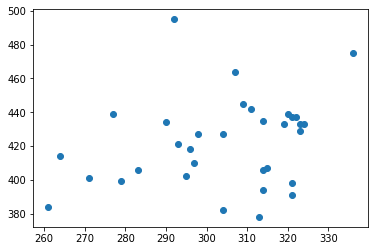

In [136]:
import matplotlib.pyplot as plt
plt.scatter(y_coordinate,x_coordinate)

$ \textbf{total no of clusters = (total demand/capacity of each truck}) $

In [137]:
sum=0
for i in range(len(file1)):
  sum=sum+file1[i][3]
print(sum)
cp=8000

29370.0


In [138]:

n_clusters=int(np.ceil(sum/cp))  # taking the ceiling value
centroid=[]  # here is the list specifying the centroids
# code to select the initial centroid this can be done based on the demands
d_sorted= sorted(file1, key=itemgetter(3),reverse=True)
for i in range(n_clusters):
  centroid.append(d_sorted[i][1:3])

In [139]:
centroid

[array([283., 406.]),
 array([277., 439.]),
 array([322., 437.]),
 array([290., 434.])]

forming a matrix known as the EuclidianDistance which stores the distance of all points from each of the centroid

In [140]:
def cluster_formation():
  EuclideanDistance=[]
  for i in range(n_clusters):
    a_1=[]
    for j in range(len(file1)):
      distance=((file1[j][1]-centroid[i][0])**2+(file1[j][2]-centroid[i][1])**2)**0.5
      a_1.append(distance)
    EuclideanDistance.append(a_1)
  EuclideanDistance=pd.DataFrame(EuclideanDistance)
  min_distance_centroid=EuclideanDistance.idxmin()
  min_distance_centroid=np.array(min_distance_centroid)
  min_distance_centroid
  t=[]
  cl=[]
  for k in range(len(file1)):
      a=[]
      b=[]
      c=[]
      d=[]
      t.append([k,min_distance_centroid[k]])
  for k in range(len(file1)):
      if t[k][1]==0:
        a.append(t[k][0])
      elif t[k][1]==1:
        b.append(t[k][0])
      elif t[k][1]==2:
        c.append(t[k][0])
      else :
        d.append(t[k][0])
  cl.append(a)
  cl.append(b)
  cl.append(c)
  cl.append(d)
  centroid_n=[]
  for j in cl:
    r_x=0
    r_y=0
    for i in j:
      r_x=r_x+file1[i][1]
      r_y=r_y+file1[i][2]
    a_0=((r_x/len(j)),(r_y/len(j)))
    centroid_n.append(a_0)
  # print(centroid_n)
  return centroid_n,cl

In [141]:
#checking for whether the given cluster is possible or
def func(a):
  sum_d=0
  for i in range(len(a)):
    sum_d=sum_d+file1[a[i]][3]
  return sum_d

In [142]:
# centroid_final= cluster_formation()
# print(centroid_final)
# # centroid.clear()
# # for y in range(len(centroid_final)):
# #   centroid.append(centroid_final[y])

In [143]:
for i in range(len(centroid)):
  centroid_final,cl_final=cluster_formation()
  centroid.clear()
  for y in range(len(centroid_final)):
    centroid.append(centroid_final[y])
  print(centroid)

[(295.15384615384613, 397.3076923076923), (284.5, 467.0), (318.7692307692308, 439.15384615384613), (296.2, 425.4)]
[(299.0769230769231, 396.7692307692308), (299.5, 479.5), (320.1818181818182, 439.8181818181818), (288.85714285714283, 425.7142857142857)]
[(299.0769230769231, 396.7692307692308), (311.6666666666667, 478.0), (318.6, 436.3), (288.85714285714283, 425.7142857142857)]
[(299.0769230769231, 396.7692307692308), (311.6666666666667, 478.0), (318.6, 436.3), (288.85714285714283, 425.7142857142857)]


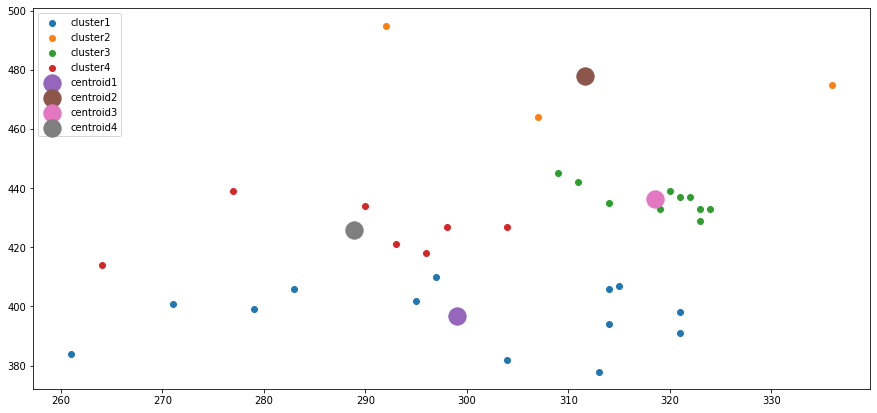

In [144]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15,7))
plt.scatter([file1[r][1] for r in cl_final[0]],[file1[e][2] for e in cl_final[0]])
plt.scatter([file1[r][1] for r in cl_final[1]],[file1[e][2] for e in cl_final[1]])
plt.scatter([file1[r][1] for r in cl_final[2]],[file1[e][2] for e in cl_final[2]])
plt.scatter([file1[r][1] for r in cl_final[3]],[file1[e][2] for e in cl_final[3]])
for i in range(len(centroid)):
  plt.scatter(centroid[i][0],centroid[i][1],s=300)
plt.legend(['cluster1','cluster2','cluster3','cluster4','centroid1','centroid2','centroid3','centroid4'])
plt.show()

In [145]:
for i in range(len(cl_final)):
  print(cl_final[i])

[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
[0, 3, 4]
[2, 5, 6, 7, 8, 9, 10, 11, 12, 32]
[1, 13, 14, 15, 29, 30, 31]


In [146]:
def capacity_requirement(cl_final, cp):
  for i in range(len(cl_final)-1):
    # while func(cl_final[i])>6000:
    if func(cl_final[i])<=cp:
      # print('cluster',cl_final[i],'is the',i,'cluster')
      None
    else :
      j=0
      while func(cl_final[i])>cp:
        # print(i,j)
        a=cl_final[i][j]
        cl_final[i].remove(a)
        cl_final[i+1].append(a)
        # print(a)
        # print(func(cl_final[i]))
        a=0
      # print('cluster',cl_final[i],'is the',i,'cluster')
  if func(cl_final[len(cl_final)-1])<=cp:
      # print('cluster',cl_final[len(cl_final)-1],'is the',(len(cl_final)-1),'cluster')
      None
  else:
    j=0
    while func(cl_final[len(cl_final)-1])>cp:
      a=cl_final[len(cl_final)-1][j]
      cl_final[len(cl_final)-1].remove(a)
      cl_final[0].append(a)
      a=0
    # print('cluster',cl_final[len(cl_final)-1],'is the',(len(cl_final)-1),'cluster')
    print(cl_final)
  return cl_final

In [147]:
cl_final_m=capacity_requirement(cl_final,cp)

In [148]:
cl_final_m

[[24, 25, 26, 27, 28],
 [0, 3, 4, 16, 17, 18, 19, 20, 21, 22, 23],
 [2, 5, 6, 7, 8, 9, 10, 11, 12, 32],
 [1, 13, 14, 15, 29, 30, 31]]

In [149]:
while func(cl_final_m[0])>cp:
  cl_final=capacity_requirement(cl_final,cp)

In [150]:
cl_final

[[24, 25, 26, 27, 28],
 [0, 3, 4, 16, 17, 18, 19, 20, 21, 22, 23],
 [2, 5, 6, 7, 8, 9, 10, 11, 12, 32],
 [1, 13, 14, 15, 29, 30, 31]]

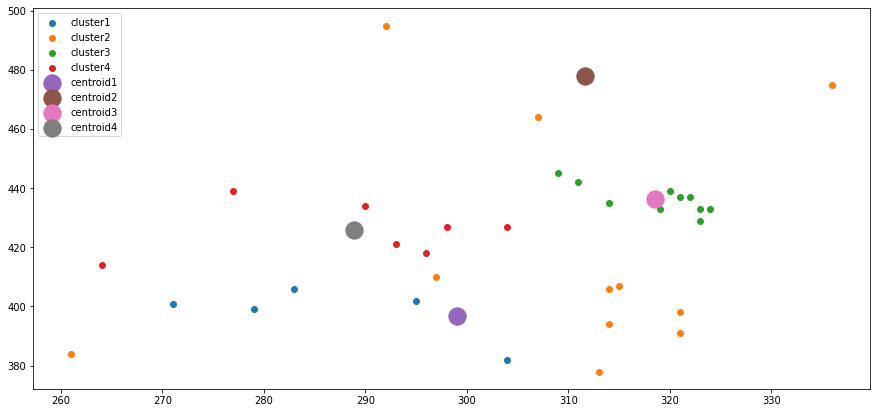

In [151]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15,7))
plt.scatter([file1[r][1] for r in cl_final_m[0]],[file1[e][2] for e in cl_final_m[0]])
plt.scatter([file1[r][1] for r in cl_final_m[1]],[file1[e][2] for e in cl_final_m[1]])
plt.scatter([file1[r][1] for r in cl_final_m[2]],[file1[e][2] for e in cl_final_m[2]])
plt.scatter([file1[r][1] for r in cl_final_m[3]],[file1[e][2] for e in cl_final_m[3]])
for i in range(len(centroid)):
  plt.scatter(centroid[i][0],centroid[i][1],s=300)
plt.legend(['cluster1','cluster2','cluster3','cluster4','centroid1','centroid2','centroid3','centroid4'])
plt.show()

removing the facility from the clusters

In [152]:
for i in range(len(cl_final_m)):
  for j in range(len(cl_final_m[i])):
    if cl_final_m[i][j]==0:
      cl_final_m[i].remove(cl_final_m[i][j])
      break

In [153]:
cl_final_m

[[24, 25, 26, 27, 28],
 [3, 4, 16, 17, 18, 19, 20, 21, 22, 23],
 [2, 5, 6, 7, 8, 9, 10, 11, 12, 32],
 [1, 13, 14, 15, 29, 30, 31]]

In [154]:
pip install python-tsp

In [155]:
for i in range(len(cl_final_m)):
  cl_final_m[i][0]=0

In [156]:
cl_final_m

[[0, 25, 26, 27, 28],
 [0, 4, 16, 17, 18, 19, 20, 21, 22, 23],
 [0, 5, 6, 7, 8, 9, 10, 11, 12, 32],
 [0, 13, 14, 15, 29, 30, 31]]

In [157]:
# developing the distance matrix func
def distance_matrix(cluster):
  print(cluster)
  distance=[]
  for i in range(len(cluster)):
    a=[]
    for j in range(len(cluster)):
      a.append(np.sqrt((file1[cluster[i]][1]-file1[cluster[j]][1])**2+ (file1[cluster[i]][2]-file1[cluster[j]][2])**2))
    distance.append(a)
  distance=np.array(distance)
  return distance

In [158]:
from python_tsp.exact import solve_tsp_dynamic_programming
sum_optimal=0
permuatation_list=[]
for i in range(len(cl_final_m)):
  permutation, distance= solve_tsp_dynamic_programming(distance_matrix(cl_final_m[i]))
  print(distance)
  permuatation_list.append(permutation)
  sum_optimal=sum_optimal+distance
print('optimal cost using k means capacitated clustering',sum_optimal)

[0, 25, 26, 27, 28]
218.32313850006034
[0, 4, 16, 17, 18, 19, 20, 21, 22, 23]
344.0914970770543
[0, 5, 6, 7, 8, 9, 10, 11, 12, 32]
150.05272780225698
[0, 13, 14, 15, 29, 30, 31]
208.95449473718494
optimal cost using k means capacitated clustering 921.4218581165567


$$ \textbf{MEAN ABSOLUTE PERCENTAGE ERROR} $$

In [159]:
optimal_value_33=835
percentage_error=(np.absolute(optimal_value_33-sum_optimal)/optimal_value_33)*100
print('mean_absolute_percentage_error_32',percentage_error)

mean_absolute_percentage_error_32 10.349923127731339


$$ \textbf{MEAN ABSOLUTE PERCENTAGE ERROR FOR 32 CITIES : 10.35%} $$

# **FOR 21 CITIES**

In [160]:
file2 = np.loadtxt("/content/21 customers data sert.txt")
print(file2)

[[1.00e+00 1.45e+02 2.15e+02 0.00e+00]
 [2.00e+00 1.51e+02 2.64e+02 1.10e+03]
 [3.00e+00 1.59e+02 2.61e+02 7.00e+02]
 [4.00e+00 1.30e+02 2.54e+02 8.00e+02]
 [5.00e+00 1.28e+02 2.52e+02 1.40e+03]
 [6.00e+00 1.63e+02 2.47e+02 2.10e+03]
 [7.00e+00 1.46e+02 2.46e+02 4.00e+02]
 [8.00e+00 1.61e+02 2.42e+02 8.00e+02]
 [9.00e+00 1.42e+02 2.39e+02 1.00e+02]
 [1.00e+01 1.63e+02 2.36e+02 5.00e+02]
 [1.10e+01 1.48e+02 2.32e+02 6.00e+02]
 [1.20e+01 1.28e+02 2.31e+02 1.20e+03]
 [1.30e+01 1.56e+02 2.17e+02 1.30e+03]
 [1.40e+01 1.29e+02 2.14e+02 1.30e+03]
 [1.50e+01 1.46e+02 2.08e+02 3.00e+02]
 [1.60e+01 1.64e+02 2.08e+02 9.00e+02]
 [1.70e+01 1.41e+02 2.06e+02 2.10e+03]
 [1.80e+01 1.47e+02 1.93e+02 1.00e+03]
 [1.90e+01 1.64e+02 1.93e+02 9.00e+02]
 [2.00e+01 1.29e+02 1.89e+02 2.50e+03]
 [2.10e+01 1.55e+02 1.85e+02 1.80e+03]
 [2.20e+01 1.39e+02 1.82e+02 7.00e+02]]


In [161]:
sum=0
for i in range(len(file2)):
  sum=sum+file2[i][3]
print(sum)
cp=6000

22500.0


In [162]:
n_clusters=int(np.ceil(sum/cp))  # taking the ceiling value
centroid=[]  # here is the list specifying the centroids
# code to select the initial centroid this can be done based on the demands
d_sorted= sorted(file2, key=itemgetter(3),reverse=True)
for i in range(n_clusters):
  centroid.append(d_sorted[i][1:3])

In [163]:
centroid

[array([129., 189.]),
 array([163., 247.]),
 array([141., 206.]),
 array([155., 185.])]

In [164]:
def cluster_formation():
  EuclideanDistance=[]
  for i in range(n_clusters):
    a_1=[]
    for j in range(len(file2)):
      distance=((file2[j][1]-centroid[i][0])**2+(file2[j][2]-centroid[i][1])**2)**0.5
      a_1.append(distance)
    EuclideanDistance.append(a_1)
  EuclideanDistance=pd.DataFrame(EuclideanDistance)
  min_distance_centroid=EuclideanDistance.idxmin()
  min_distance_centroid=np.array(min_distance_centroid)
  min_distance_centroid
  t=[]
  cl=[]
  for k in range(len(file2)):
      a=[]
      b=[]
      c=[]
      d=[]
      t.append([k,min_distance_centroid[k]])
  for k in range(len(file2)):
      if t[k][1]==0:
        a.append(t[k][0])
      elif t[k][1]==1:
        b.append(t[k][0])
      elif t[k][1]==2:
        c.append(t[k][0])
      else :
        d.append(t[k][0])
  cl.append(a)
  cl.append(b)
  cl.append(c)
  cl.append(d)
  centroid_n=[]
  for j in cl:
    r_x=0
    r_y=0
    for i in j:
      r_x=r_x+file2[i][1]
      r_y=r_y+file2[i][2]
    a_0=((r_x/len(j)),(r_y/len(j)))
    centroid_n.append(a_0)
  # print(centroid_n)
  return centroid_n,cl

In [165]:
#checking for whether the given cluster is possible or
def func(a):
  sum_d=0
  for i in range(len(a)):
    sum_d=sum_d+file2[a[i]][3]
  return sum_d

In [166]:
for i in range(len(centroid)):
  centroid_final,cl_final=cluster_formation()
  centroid.clear()
  for y in range(len(centroid_final)):
    centroid.append(centroid_final[y])
  print(centroid)

[(134.0, 185.5), (149.1, 247.3), (144.14285714285714, 214.14285714285714), (155.33333333333334, 190.33333333333334)]
[(134.0, 185.5), (149.1, 247.3), (140.83333333333334, 215.16666666666666), (157.5, 194.75)]
[(134.0, 185.5), (149.1, 247.3), (140.83333333333334, 215.16666666666666), (157.5, 194.75)]
[(134.0, 185.5), (149.1, 247.3), (140.83333333333334, 215.16666666666666), (157.5, 194.75)]


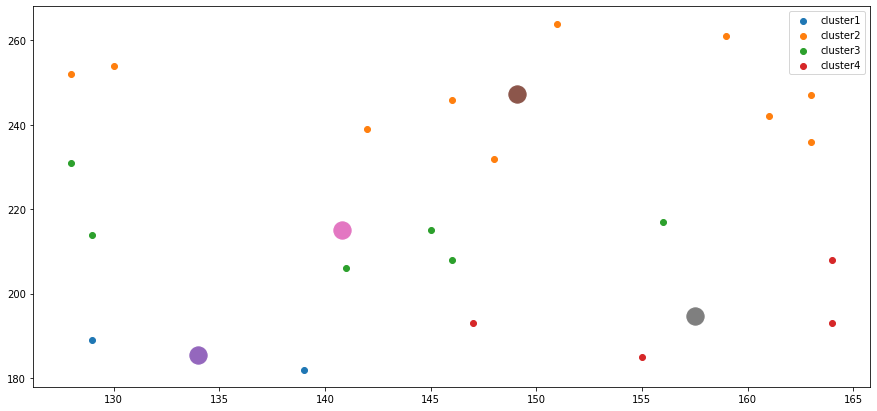

In [167]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15,7))
plt.scatter([file2[r][1] for r in cl_final[0]],[file2[e][2] for e in cl_final[0]])
plt.scatter([file2[r][1] for r in cl_final[1]],[file2[e][2] for e in cl_final[1]])
plt.scatter([file2[r][1] for r in cl_final[2]],[file2[e][2] for e in cl_final[2]])
plt.scatter([file2[r][1] for r in cl_final[3]],[file2[e][2] for e in cl_final[3]])
for i in range(len(centroid)):
  plt.scatter(centroid[i][0],centroid[i][1],s=300)
plt.legend(['cluster1','cluster2','cluster3','cluster4'])
plt.show()

In [168]:
for i in range(len(cl_final)):
  print(cl_final[i])

[19, 21]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 11, 12, 13, 14, 16]
[15, 17, 18, 20]


In [169]:
def capacity_requirement(cl_final, cp):
  for i in range(len(cl_final)-1):
    # while func(cl_final[i])>6000:
    if func(cl_final[i])<=cp:
      # print('cluster',cl_final[i],'is the',i,'cluster')
      None
    else :
      j=0
      while func(cl_final[i])>cp:
        # print(i,j)
        a=cl_final[i][j]
        cl_final[i].remove(a)
        cl_final[i+1].append(a)
        # print(a)
        # print(func(cl_final[i]))
        a=0
      # print('cluster',cl_final[i],'is the',i,'cluster')
  if func(cl_final[len(cl_final)-1])<=cp:
      # print('cluster',cl_final[len(cl_final)-1],'is the',(len(cl_final)-1),'cluster')
      None
  else:
    j=0
    while func(cl_final[len(cl_final)-1])>cp:
      a=cl_final[len(cl_final)-1][j]
      cl_final[len(cl_final)-1].remove(a)
      cl_final[0].append(a)
      a=0
    # print('cluster',cl_final[len(cl_final)-1],'is the',(len(cl_final)-1),'cluster')
    print(cl_final)
  return cl_final

In [170]:
cl_final_m=capacity_requirement(cl_final,cp)

[[19, 21, 15, 17, 18], [4, 5, 6, 7, 8, 9, 10], [14, 16, 1, 2, 3], [20, 0, 11, 12, 13]]


In [171]:
while func(cl_final_m[0])>cp:
  cl_final=capacity_requirement(cl_final,cp)

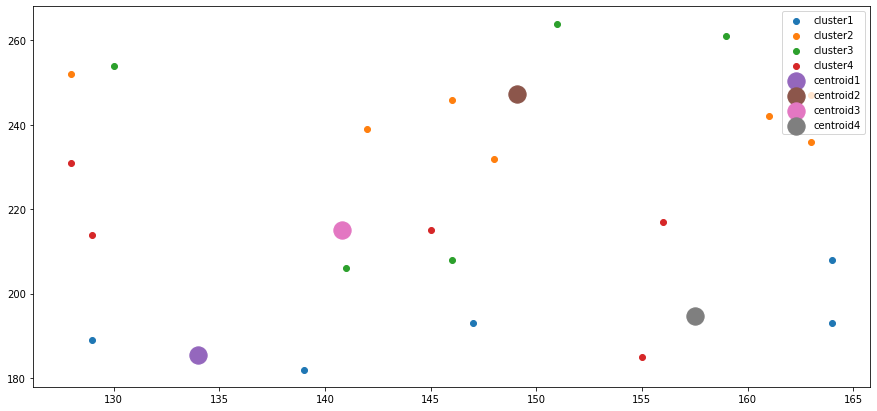

In [172]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15,7))
plt.scatter([file2[r][1] for r in cl_final_m[0]],[file2[e][2] for e in cl_final_m[0]])
plt.scatter([file2[r][1] for r in cl_final_m[1]],[file2[e][2] for e in cl_final_m[1]])
plt.scatter([file2[r][1] for r in cl_final_m[2]],[file2[e][2] for e in cl_final_m[2]])
plt.scatter([file2[r][1] for r in cl_final_m[3]],[file2[e][2] for e in cl_final_m[3]])
for i in range(len(centroid)):
  plt.scatter(centroid[i][0],centroid[i][1],s=300)
plt.legend(['cluster1','cluster2','cluster3','cluster4','centroid1','centroid2','centroid3','centroid4'])
plt.show()

In [173]:
for i in range(len(cl_final_m)):
  for j in range(len(cl_final_m[i])):
    if cl_final_m[i][j]==0:
      cl_final_m[i].remove(cl_final_m[i][j])
      break

In [174]:
for i in range(len(cl_final_m)):
  cl_final_m[i][0]=0

In [175]:
cl_final_m

[[0, 21, 15, 17, 18],
 [0, 5, 6, 7, 8, 9, 10],
 [0, 16, 1, 2, 3],
 [0, 11, 12, 13]]

In [176]:
# developing the distance matrix func
def distance_matrix(cluster):
  print(cluster)
  distance=[]
  for i in range(len(cluster)):
    a=[]
    for j in range(len(cluster)):
      a.append(np.sqrt((file2[cluster[i]][1]-file2[cluster[j]][1])**2+ (file2[cluster[i]][2]-file2[cluster[j]][2])**2))
    distance.append(a)
  distance=np.array(distance)
  return distance

In [177]:
from python_tsp.exact import solve_tsp_dynamic_programming
sum_optimal=0
permuatation_list=[]
for i in range(len(cl_final_m)):
  permutation, distance= solve_tsp_dynamic_programming(distance_matrix(cl_final_m[i]))
  print(distance)
  permuatation_list.append(permutation)
  sum_optimal=sum_optimal+distance
print('optimal cost using k means capacitated clustering',sum_optimal)

[0, 21, 15, 17, 18]
98.25364984192188
[0, 5, 6, 7, 8, 9, 10]
90.94221857249983
[0, 16, 1, 2, 3]
138.9798183760054
[0, 11, 12, 13]
75.54589748030381
optimal cost using k means capacitated clustering 403.7215842707309


$$ \textbf{MEAN ABSOLUTE PERCENTAGE ERROR} $$

In [178]:
optimal_value_21=375
percentage_error=(np.absolute(optimal_value_21-sum_optimal)/optimal_value_21)*100
print('mean_absolute_percentage_error_21',percentage_error)

mean_absolute_percentage_error_21 7.65908913886157


$$ \textbf{MEAN ABSOLUTE PERCENTAGE ERROR FOR 21 CITIES : 7.67%} $$

# FOR 100 CITIES

In [179]:
file3 = np.loadtxt("/content/100_cities_dd.txt")
print(file3)

[[  1.  35.  35.   0.]
 [  2.  41.  49.  10.]
 [  3.  35.  17.   7.]
 [  4.  55.  45.  13.]
 [  5.  55.  20.  19.]
 [  6.  15.  30.  26.]
 [  7.  25.  30.   3.]
 [  8.  20.  50.   5.]
 [  9.  10.  43.   9.]
 [ 10.  55.  60.  16.]
 [ 11.  30.  60.  16.]
 [ 12.  20.  65.  12.]
 [ 13.  50.  35.  19.]
 [ 14.  30.  25.  23.]
 [ 15.  15.  10.  20.]
 [ 16.  30.   5.   8.]
 [ 17.  10.  20.  19.]
 [ 18.   5.  30.   2.]
 [ 19.  20.  40.  12.]
 [ 20.  15.  60.  17.]
 [ 21.  45.  65.   9.]
 [ 22.  45.  20.  11.]
 [ 23.  45.  10.  18.]
 [ 24.  55.   5.  29.]
 [ 25.  65.  35.   3.]
 [ 26.  65.  20.   6.]
 [ 27.  45.  30.  17.]
 [ 28.  35.  40.  16.]
 [ 29.  41.  37.  16.]
 [ 30.  64.  42.   9.]
 [ 31.  40.  60.  21.]
 [ 32.  31.  52.  27.]
 [ 33.  35.  69.  23.]
 [ 34.  53.  52.  11.]
 [ 35.  65.  55.  14.]
 [ 36.  63.  65.   8.]
 [ 37.   2.  60.   5.]
 [ 38.  20.  20.   8.]
 [ 39.   5.   5.  16.]
 [ 40.  60.  12.  31.]
 [ 41.  40.  25.   9.]
 [ 42.  42.   7.   5.]
 [ 43.  24.  12.   5.]
 [ 44.  23.

In [180]:
sum=0
for i in range(len(file3)):
  sum=sum+file3[i][3]
print(sum)
cp=112

1458.0


In [181]:
n_clusters=int(np.ceil(sum/cp))  # taking the ceiling value
centroid=[]  # here is the list specifying the centroids
# code to select the initial centroid this can be done based on the demands
d_sorted= sorted(file3, key=itemgetter(3),reverse=True)
for i in range(n_clusters):
  centroid.append(d_sorted[i][1:3])

In [182]:
centroid

[array([16., 22.]),
 array([13., 52.]),
 array([56., 39.]),
 array([ 4., 18.]),
 array([60., 12.]),
 array([ 6., 68.]),
 array([55.,  5.]),
 array([21., 24.]),
 array([31., 52.]),
 array([ 8., 56.]),
 array([26., 27.]),
 array([15., 30.]),
 array([55., 54.]),
 array([28., 18.])]

In [183]:
def cluster_formation():
  EuclideanDistance=[]
  for i in range(n_clusters):
    a_1=[]
    for j in range(len(file3)):
      distance=((file3[j][1]-centroid[i][0])**2+(file3[j][2]-centroid[i][1])**2)**0.5
      a_1.append(distance)
    EuclideanDistance.append(a_1)
  EuclideanDistance=pd.DataFrame(EuclideanDistance)
  min_distance_centroid=EuclideanDistance.idxmin()
  min_distance_centroid=np.array(min_distance_centroid)
  min_distance_centroid
  t=[]
  cl=[]
  for k in range(len(file3)):
      A=[]
      B=[]
      C=[]
      D=[]
      E=[]
      F=[]
      G=[]
      H=[]
      I=[]
      J=[]
      K=[]
      L=[]
      M=[]
      N=[]
      t.append([k,min_distance_centroid[k]])
  for k in range(len(file3)):
      if t[k][1]==0:
        A.append(t[k][0])
      elif t[k][1]==1:
        B.append(t[k][0])
      elif t[k][1]==2:
        C.append(t[k][0])
      elif t[k][1]==3:
        D.append(t[k][0])
      elif t[k][1]==4:
        E.append(t[k][0])
      elif t[k][1]==5:
        F.append(t[k][0])
      elif t[k][1]==6:
        G.append(t[k][0])
      elif t[k][1]==7:
        H.append(t[k][0])
      elif t[k][1]==8:
        I.append(t[k][0])
      elif t[k][1]==9:
        J.append(t[k][0])
      elif t[k][1]==10:
        K.append(t[k][0])
      elif t[k][1]==11:
        L.append(t[k][0])
      elif t[k][1]==12:
        M.append(t[k][0])
      else :
        N.append(t[k][0])
  cl.append(A)
  cl.append(B)
  cl.append(C)
  cl.append(D)
  cl.append(E)
  cl.append(F)
  cl.append(G)
  cl.append(H)
  cl.append(I)
  cl.append(J)
  cl.append(K)
  cl.append(L)
  cl.append(M)
  cl.append(N)
  centroid_n=[]
  for j in cl:
    r_x=0
    r_y=0
    for i in j:
      r_x=r_x+file3[i][1]
      r_y=r_y+file3[i][2]
    a_0=((r_x/len(j)),(r_y/len(j)))
    centroid_n.append(a_0)
  # print(centroid_n)
  return centroid_n,cl

In [184]:
#checking for whether the given cluster is possible or
def func(a):
  sum_d=0
  for i in range(len(a)):
    sum_d=sum_d+file3[a[i]][3]
  return sum_d
  

In [185]:
for i in range(len(centroid)):
  centroid_final,cl_final=cluster_formation()
  centroid.clear()
  for y in range(len(centroid_final)):
    centroid.append(centroid_final[y])
  print(centroid)

[(15.375, 19.75), (14.5, 48.0), (53.72727272727273, 37.63636363636363), (6.666666666666667, 12.333333333333334), (56.875, 16.0), (13.666666666666666, 70.0), (47.4, 9.2), (21.0, 23.8), (32.38461538461539, 55.53846153846154), (6.75, 56.0), (30.0, 29.125), (12.571428571428571, 34.285714285714285), (55.23076923076923, 59.53846153846154), (31.22222222222222, 14.444444444444445)]
[(14.2, 20.6), (17.0, 47.0), (53.46153846153846, 39.15384615384615), (8.75, 11.75), (60.5, 15.333333333333334), (17.0, 69.75), (46.625, 12.375), (21.333333333333332, 23.22222222222222), (33.2, 57.0), (6.75, 56.0), (32.22222222222222, 30.444444444444443), (12.571428571428571, 34.285714285714285), (55.81818181818182, 61.72727272727273), (28.666666666666668, 11.166666666666666)]
[(14.2, 20.6), (17.5, 45.833333333333336), (54.5, 39.333333333333336), (8.75, 11.75), (62.0, 16.0), (17.0, 69.75), (47.333333333333336, 12.333333333333334), (21.8, 23.6), (33.2, 57.0), (6.75, 56.0), (33.888888888888886, 31.555555555555557), (11

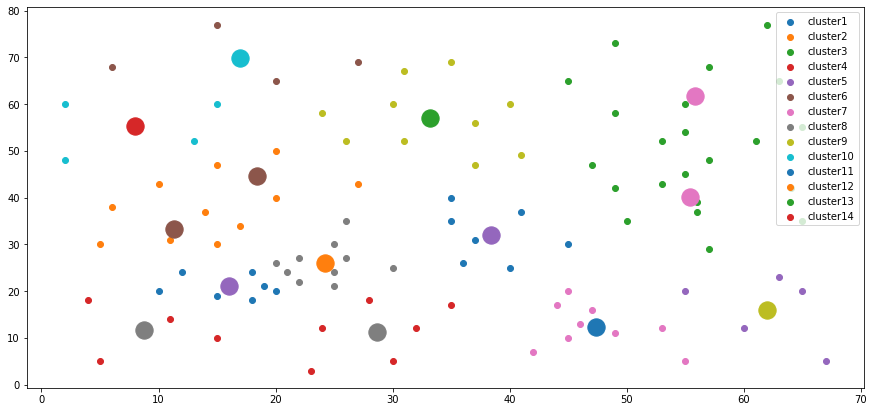

In [186]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15,7))
plt.scatter([file3[r][1] for r in cl_final[0]],[file3[e][2] for e in cl_final[0]])
plt.scatter([file3[r][1] for r in cl_final[1]],[file3[e][2] for e in cl_final[1]])
plt.scatter([file3[r][1] for r in cl_final[2]],[file3[e][2] for e in cl_final[2]])
plt.scatter([file3[r][1] for r in cl_final[3]],[file3[e][2] for e in cl_final[3]])
plt.scatter([file3[r][1] for r in cl_final[4]],[file3[e][2] for e in cl_final[4]])
plt.scatter([file3[r][1] for r in cl_final[5]],[file3[e][2] for e in cl_final[5]])
plt.scatter([file3[r][1] for r in cl_final[6]],[file3[e][2] for e in cl_final[6]])
plt.scatter([file3[r][1] for r in cl_final[7]],[file3[e][2] for e in cl_final[7]])
plt.scatter([file3[r][1] for r in cl_final[8]],[file3[e][2] for e in cl_final[8]])
plt.scatter([file3[r][1] for r in cl_final[9]],[file3[e][2] for e in cl_final[9]])
plt.scatter([file3[r][1] for r in cl_final[10]],[file3[e][2] for e in cl_final[10]])
plt.scatter([file3[r][1] for r in cl_final[11]],[file3[e][2] for e in cl_final[11]])
plt.scatter([file3[r][1] for r in cl_final[12]],[file3[e][2] for e in cl_final[12]])
plt.scatter([file3[r][1] for r in cl_final[13]],[file3[e][2] for e in cl_final[13]])
for i in range(len(centroid)):
  plt.scatter(centroid[i][0],centroid[i][1],s=300)
plt.legend(['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7','cluster8','cluster9','cluster10','cluster11','cluster12','cluster13','cluster14'])
plt.show()

In [187]:
for i in range(len(cl_final)):
  print(cl_final[i])

[16, 37, 61, 85, 91, 93, 98, 100]
[7, 8, 18, 52, 82]
[3, 12, 24, 29, 50, 54, 68, 76, 77, 79, 80]
[14, 38, 44, 86]
[4, 25, 39, 55, 67]
[11, 49, 63, 64]
[21, 22, 23, 41, 56, 72, 73, 74, 75]
[6, 13, 59, 89, 92, 94, 95, 96, 97, 99]
[1, 10, 30, 31, 32, 62, 69, 70, 88, 90]
[19, 36, 46, 47, 48]
[0, 26, 27, 28, 40, 53, 58]
[5, 17, 45, 60, 83, 84]
[9, 20, 33, 34, 35, 51, 65, 66, 71, 78, 81]
[2, 15, 42, 43, 57, 87]


In [188]:
def capacity_requirement(cl_final, cp):
  for i in range(len(cl_final)-1):
    # while func(cl_final[i])>6000:
    if func(cl_final[i])<=cp:
      # print('cluster',cl_final[i],'is the',i,'cluster')
      None
    else :
      j=0
      while func(cl_final[i])>cp:
        # print(i,j)
        a=cl_final[i][j]
        cl_final[i].remove(a)
        cl_final[i+1].append(a)
        # print(a)
        # print(func(cl_final[i]))
        a=0
      # print('cluster',cl_final[i],'is the',i,'cluster')
  if func(cl_final[len(cl_final)-1])<=cp:
      # print('cluster',cl_final[len(cl_final)-1],'is the',(len(cl_final)-1),'cluster')
      None
  else:
    j=0
    while func(cl_final[len(cl_final)-1])>cp:
      a=cl_final[len(cl_final)-1][j]
      cl_final[len(cl_final)-1].remove(a)
      cl_final[0].append(a)
      a=0
    # print('cluster',cl_final[len(cl_final)-1],'is the',(len(cl_final)-1),'cluster')
    print(cl_final)
  return cl_final

In [189]:
cl_final_m=capacity_requirement(cl_final,cp)

[[37, 61, 85, 91, 93, 98, 100, 2, 15, 42, 43, 57, 87], [7, 8, 18, 52, 82, 16], [54, 68, 76, 77, 79, 80], [44, 86, 3, 12, 24, 29, 50], [25, 39, 55, 67, 14, 38], [11, 49, 63, 64, 4], [23, 41, 56, 72, 73, 74, 75], [92, 94, 95, 96, 97, 99, 21, 22], [62, 69, 70, 88, 90, 6, 13, 59, 89], [1, 10, 30, 31, 32], [58, 19, 36, 46, 47, 48], [17, 45, 60, 83, 84, 0, 26, 27, 28, 40, 53], [66, 71, 78, 81, 5], [9, 20, 33, 34, 35, 51, 65]]


In [190]:
while func(cl_final_m[0])>cp:
  cl_final=capacity_requirement(cl_final,cp)

[[91, 93, 98, 100, 2, 15, 42, 43, 57, 87, 9, 20, 33, 34], [52, 82, 16, 37, 61, 85], [76, 77, 79, 80, 7, 8, 18], [3, 12, 24, 29, 50, 54, 68], [14, 38, 44, 86], [63, 64, 4, 25, 39, 55, 67], [56, 72, 73, 74, 75, 11, 49], [96, 97, 99, 21, 22, 23, 41], [59, 89, 92, 94, 95], [32, 62, 69, 70, 88, 90, 6, 13], [48, 1, 10, 30, 31], [28, 40, 53, 58, 19, 36, 46, 47], [5, 17, 45, 60, 83, 84, 0, 26, 27], [35, 51, 65, 66, 71, 78, 81]]


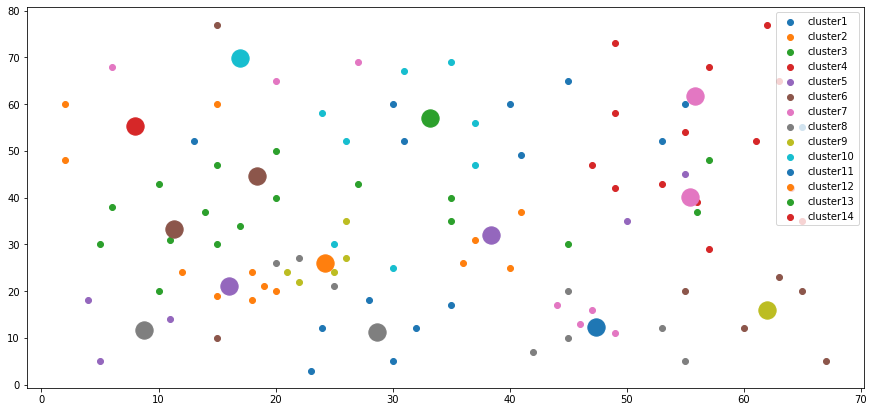

In [191]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15,7))
plt.scatter([file3[r][1] for r in cl_final[0]],[file3[e][2] for e in cl_final[0]])
plt.scatter([file3[r][1] for r in cl_final[1]],[file3[e][2] for e in cl_final[1]])
plt.scatter([file3[r][1] for r in cl_final[2]],[file3[e][2] for e in cl_final[2]])
plt.scatter([file3[r][1] for r in cl_final[3]],[file3[e][2] for e in cl_final[3]])
plt.scatter([file3[r][1] for r in cl_final[4]],[file3[e][2] for e in cl_final[4]])
plt.scatter([file3[r][1] for r in cl_final[5]],[file3[e][2] for e in cl_final[5]])
plt.scatter([file3[r][1] for r in cl_final[6]],[file3[e][2] for e in cl_final[6]])
plt.scatter([file3[r][1] for r in cl_final[7]],[file3[e][2] for e in cl_final[7]])
plt.scatter([file3[r][1] for r in cl_final[8]],[file3[e][2] for e in cl_final[8]])
plt.scatter([file3[r][1] for r in cl_final[9]],[file3[e][2] for e in cl_final[9]])
plt.scatter([file3[r][1] for r in cl_final[10]],[file3[e][2] for e in cl_final[10]])
plt.scatter([file3[r][1] for r in cl_final[11]],[file3[e][2] for e in cl_final[11]])
plt.scatter([file3[r][1] for r in cl_final[12]],[file3[e][2] for e in cl_final[12]])
plt.scatter([file3[r][1] for r in cl_final[13]],[file3[e][2] for e in cl_final[13]])
for i in range(len(centroid)):
  plt.scatter(centroid[i][0],centroid[i][1],s=300)
plt.legend(['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7','cluster8','cluster9','cluster10','cluster11','cluster12','cluster13','cluster14'])
plt.show()

In [192]:
for i in range(len(cl_final)):
  for j in range(len(cl_final[i])):
    if cl_final[i][j]==0:
      cl_final[i].remove(cl_final[i][j])
      break

In [193]:
for i in range(len(cl_final)):
  cl_final[i][0]=0

In [194]:
cl_final

[[0, 15, 42, 43, 57, 87, 9, 20, 33, 34],
 [0, 61, 85, 91, 93, 98, 100],
 [0, 80, 7, 8, 18, 52, 82, 16],
 [0, 29, 50, 54, 68, 76, 77],
 [0, 44, 86, 3, 12],
 [0, 4, 25, 39, 55, 67, 14],
 [0, 73, 74, 75, 11, 49, 63],
 [0, 97, 99, 21, 22, 23, 41, 56],
 [0, 89, 92, 94, 95],
 [0, 62, 69, 70, 88, 90, 6, 13],
 [0, 1, 10, 30, 31],
 [0, 40, 53, 58, 19, 36, 46, 47],
 [0, 17, 45, 60, 83, 84, 26, 27],
 [0, 51, 65, 66, 71, 78, 81]]

In [195]:
# developing the distance matrix func
def distance_matrix(cluster):
  print(cluster)
  distance=[]
  for i in range(len(cluster)):
    a=[]
    for j in range(len(cluster)):
      a.append(np.sqrt((file3[cluster[i]][1]-file3[cluster[j]][1])**2+ (file3[cluster[i]][2]-file3[cluster[j]][2])**2))
    distance.append(a)
  distance=np.array(distance)
  return distance

In [196]:
from python_tsp.exact import solve_tsp_dynamic_programming
sum_optimal=0
permuatation_list=[]
for i in range(len(cl_final_m)):
  permutation, distance= solve_tsp_dynamic_programming(distance_matrix(cl_final_m[i]))
  print(distance)
  permuatation_list.append(permutation)
  sum_optimal=sum_optimal+distance
print('optimal cost using k means capacitated clustering',sum_optimal)

[0, 15, 42, 43, 57, 87, 9, 20, 33, 34]
160.7416850243174
[0, 61, 85, 91, 93, 98, 100]
60.96481865171371
[0, 80, 7, 8, 18, 52, 82, 16]
132.71381761201923
[0, 29, 50, 54, 68, 76, 77]
77.59116848876299
[0, 44, 86, 3, 12]
121.25308565082298
[0, 4, 25, 39, 55, 67, 14]
139.24183961319983
[0, 73, 74, 75, 11, 49, 63]
156.54639278959746
[0, 97, 99, 21, 22, 23, 41, 56]
98.63119438215006
[0, 89, 92, 94, 95]
41.41089402316011
[0, 62, 69, 70, 88, 90, 6, 13]
91.6959219629759
[0, 1, 10, 30, 31]
61.80341417378661
[0, 40, 53, 58, 19, 36, 46, 47]
115.08934046214054
[0, 17, 45, 60, 83, 84, 26, 27]
93.47891728354095
[0, 51, 65, 66, 71, 78, 81]
116.22613095646982
optimal cost using k means capacitated clustering 1467.388621074658


$$ \textbf{MEAN ABSOLUTE PERCENTAGE ERROR} $$

In [197]:
optimal_value_100=1070
percentage_error=(np.absolute(optimal_value_100-sum_optimal)/optimal_value_100)*100
print('mean_absolute_percentage_error_21',percentage_error)

mean_absolute_percentage_error_21 37.13912346492131


$$ \textbf{MEAN ABSOLUTE PERCENTAGE ERROR FOR 21 CITIES : 37.139%} $$

Text(0.5, 1.0, 'error vs no of cities')

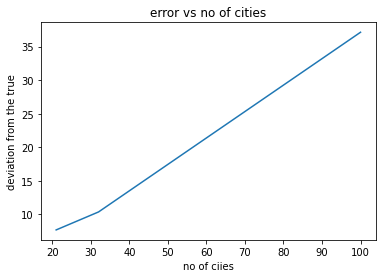

In [198]:
plt.plot([21,32,100],[7.67,10.35,37.14])
plt.xlabel("no of ciies")
plt.ylabel("deviation from the true")
plt.title("error vs no of cities")